# US Arrests EDA

This data set contains statistics, in arrests per 100,000 residents for assault, murder, and rape in each of the 50 US states in 1973. 

Also given is the percentage of the population living in urban areas.

The first column represents state names, and the remaining columns contain numerical data related to crime statistics.

In [85]:
# Import Libraries
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import seaborn as sns


In [86]:
# Load the UsArrests dataset
try:
    us_arrests_df = pd.read_csv("UsArrests.csv")
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("Error: The file 'UsArrests.csv' was not found.")
    us_arrests_df = pd.DataFrame()

# Display the first few rows of the DataFrame if it is not empty
if not us_arrests_df.empty:
    display(us_arrests_df.head())
else:
    print("DataFrame is empty. Please check the file path and try again.")


Dataset loaded successfully!


,City,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


### Data Preprocessing and Cleaning

In [87]:
# Number of rows before removing duplicates
initial_row_count = us_arrests_df.shape[0]
print(f"Number of rows in dataset: {initial_row_count}")

# Identify and display duplicate rows
duplicates = us_arrests_df[us_arrests_df.duplicated()]

if len(duplicates) > 0:
    display(duplicates)
    print(f"Number of duplicate rows: {len(duplicates)}")
else:
    print("No duplicate rows found.")


Number of rows in dataset: 50
No duplicate rows found.


In [88]:
# Display rows with missing data
missing_data_rows = us_arrests_df[us_arrests_df.isna().any(axis=1)]

if not missing_data_rows.empty:
    display(missing_data_rows)
    print(f"Number of rows with missing data: {len(missing_data_rows)}")
else:
    print("No rows with missing data found.")


No rows with missing data found.


In [89]:
# Rename 'City' column to 'State'
us_arrests_df.rename(columns={'City': 'State'}, inplace=True)

# Display the first few rows of the updated DataFrame
display(us_arrests_df.head())


,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [90]:
# Create a new column 'total_crime' by summing 'Murder', 'Assault', and 'Rape' for each state
us_arrests_df['total_crime'] = us_arrests_df['Murder'] + us_arrests_df['Assault'] + us_arrests_df['Rape']

# Display the first few rows of the DataFrame with the new column
display(us_arrests_df.head())


,State,Murder,Assault,UrbanPop,Rape,total_crime
0,Alabama,13.2,236,58,21.2,270.4
1,Alaska,10.0,263,48,44.5,317.5
2,Arizona,8.1,294,80,31.0,333.1
3,Arkansas,8.8,190,50,19.5,218.3
4,California,9.0,276,91,40.6,325.6


In [91]:
# Duplicate the 'State' column to create a new column called 'state_abbrev'
us_arrests_df['state_abbrev'] = us_arrests_df['State']

# Display the first few rows of the DataFrame to confirm the duplication
display(us_arrests_df.head())


,State,Murder,Assault,UrbanPop,Rape,total_crime,state_abbrev
0,Alabama,13.2,236,58,21.2,270.4,Alabama
1,Alaska,10.0,263,48,44.5,317.5,Alaska
2,Arizona,8.1,294,80,31.0,333.1,Arizona
3,Arkansas,8.8,190,50,19.5,218.3,Arkansas
4,California,9.0,276,91,40.6,325.6,California


In [92]:
# Map state names to valid two-letter state abbreviations
state_abbrev_map = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR',
    'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE',
    'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID',
    'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS',
    'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS',
    'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV',
    'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY',
    'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
    'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT',
    'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV',
    'Wisconsin': 'WI', 'Wyoming': 'WY'
}

# Update the 'state_abbrev' column with state abbreviations
us_arrests_df['state_abbrev'] = us_arrests_df['state_abbrev'].map(state_abbrev_map)

# Display the updated DataFrame
display(us_arrests_df.head())


,State,Murder,Assault,UrbanPop,Rape,total_crime,state_abbrev
0,Alabama,13.2,236,58,21.2,270.4,AL
1,Alaska,10.0,263,48,44.5,317.5,AK
2,Arizona,8.1,294,80,31.0,333.1,AZ
3,Arkansas,8.8,190,50,19.5,218.3,AR
4,California,9.0,276,91,40.6,325.6,CA


In [93]:
# Show data types of columns
print("\nData types of all columns:")
print(us_arrests_df.dtypes)

# Show unique values for each column
for column in us_arrests_df.columns:
    unique_values = us_arrests_df[column].unique()
    print(f"\nColumn: {column}, Unique Values: {unique_values}")



Data types of all columns:
State            object
Murder          float64
Assault           int64
UrbanPop          int64
Rape            float64
total_crime     float64
state_abbrev     object
dtype: object

Column: State, Unique Values: ['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'Florida' 'Georgia' 'Hawaii' 'Idaho' 'Illinois'
 'Indiana' 'Iowa' 'Kansas' 'Kentucky' 'Louisiana' 'Maine' 'Maryland'
 'Massachusetts' 'Michigan' 'Minnesota' 'Mississippi' 'Missouri' 'Montana'
 'Nebraska' 'Nevada' 'New Hampshire' 'New Jersey' 'New Mexico' 'New York'
 'North Carolina' 'North Dakota' 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania'
 'Rhode Island' 'South Carolina' 'South Dakota' 'Tennessee' 'Texas' 'Utah'
 'Vermont' 'Virginia' 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming']

Column: Murder, Unique Values: [13.2 10.   8.1  8.8  9.   7.9  3.3  5.9 15.4 17.4  5.3  2.6 10.4  7.2
  2.2  6.   9.7  2.1 11.3  4.4 12.1  2.7 16.1  4.3 12.2  7.4 11.4 11.1
 13.

### Data Exploration

#### Columns:

`State`: The name of the State.  
`Murder`: The murder rate (per 100,000 inhabitants).  
`Assault`: The number of assaults (per 100,000 inhabitants).  
`UrbanPop`: The percentage of the urban population.  
`Rape`: The rape rate (per 100,000 inhabitants).  
`total_crime`: The total crime rate calculated as the sum of murder, assault, and rape.  
`state_abbrev`: The two-letter abbreviation for each state.

#### Data Summary:

There are 50 entries, corresponding to 50 different States. The data types are:    

- `State`: Object (string)  
- `Murder`: Float64  
- `Assault`: Int64  
- `UrbanPop`: Int64  
- `Rape`: Float64  
- `total_crime`: Float64  
- `state_abbrev`: Object (string)

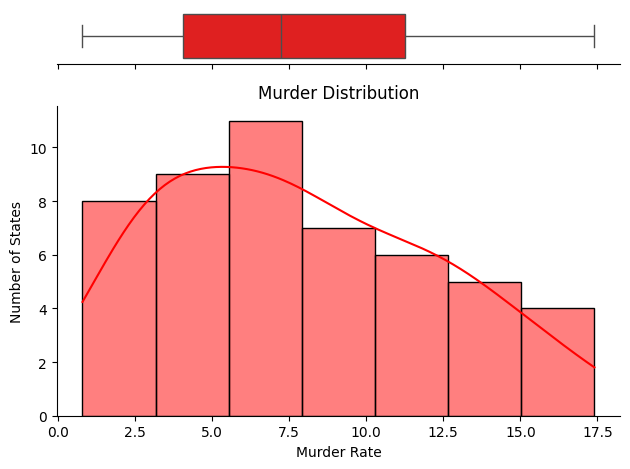

In [94]:
def plot_column_distribution(dataframe, column_name):
    """
    This function creates a boxplot and histogram for a given column in a DataFrame.
    
    Parameters:
    - dataframe: The pandas DataFrame containing the data.
    - column_name: The column in the DataFrame to plot.
    """
    # Define a color map for specific columns
    color_map = {
        'Murder': 'red',
        'Assault': 'orange',
        'Rape': 'green',
        'UrbanPop': 'blue'
    }
    
    # Get the color for the column, default to blue if not found
    color = color_map.get(column_name, 'blue')
    
    # Create the figure and axis objects (boxplot and histogram)
    fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                          gridspec_kw={"height_ratios": (.15, .85)})

    # Create a horizontal boxplot for the specified column
    sns.boxplot(x=dataframe[column_name], ax=ax_box, orient='h', color=color)

    # Create a histogram with a KDE plot for the specified column
    sns.histplot(dataframe[column_name], ax=ax_hist, kde=True, color=color)

    # Remove y-axis ticks from the boxplot
    ax_box.set(yticks=[])

    # Set x-axis label for both plots
    ax_hist.set_xlabel(f'{column_name} Rate')

    # Set y-axis label for the histogram
    ax_hist.set_ylabel('Number of States')

    # Add a title for better readability
    ax_hist.set_title(f"{column_name} Distribution")

    # Despine the plots for a cleaner look
    sns.despine(ax=ax_hist)
    sns.despine(ax=ax_box, left=True)

    # Display the plots
    plt.tight_layout()
    plt.show()

plot_column_distribution(us_arrests_df, 'Murder')


### This visualization shows the distribution of murder rates across different U.S. states. 

- The top box plot indicates that the middle 50% of states have murder rates between about 3.5 and 9.5, with a median around 7.
- The histogram beneath it reveals a right-skewed distribution, with most states having murder rates between 2.5 and 10. Fewer states experience higher murder rates (above 10).
- The overlaid density curve further emphasizes this skewness, showing a peak around 6-7.

**Assumptions**:
- Most states tend to have relatively moderate murder rates.
- There are fewer outliers with higher murder rates, as indicated by the right tail.
- The data is not normally distributed but right-skewed.

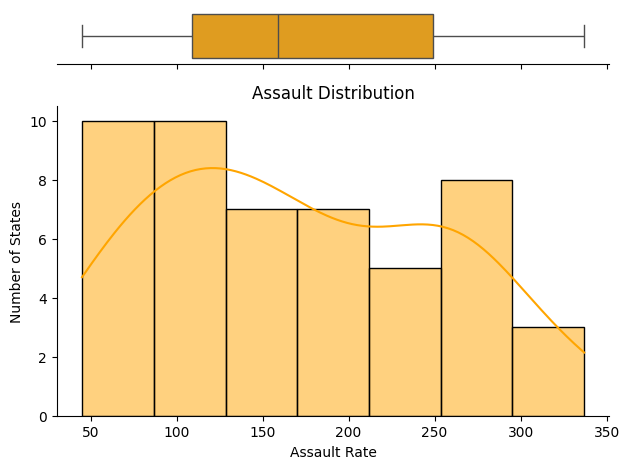

In [95]:
plot_column_distribution(us_arrests_df, 'Assault')


### This visualization presents the distribution of assault rates across U.S. states:

- The box plot at the top shows that the middle 50% of states have assault rates between approximately 85 and 210, with a median near 150.
- The histogram shows a bimodal distribution, with peaks around 90 and 260, indicating two groups of states: one with lower assault rates (50-150) and another with higher rates (200-300).
- The density curve confirms these two peaks and suggests that fewer states experience extreme assault rates, especially beyond 300.

**Assumptions**:
- There may be two distinct clusters of states regarding assault rates.
- Assault rates are more evenly distributed compared to murder rates, but some states still have notably high rates.
- The distribution is somewhat spread out, without a clear skew.

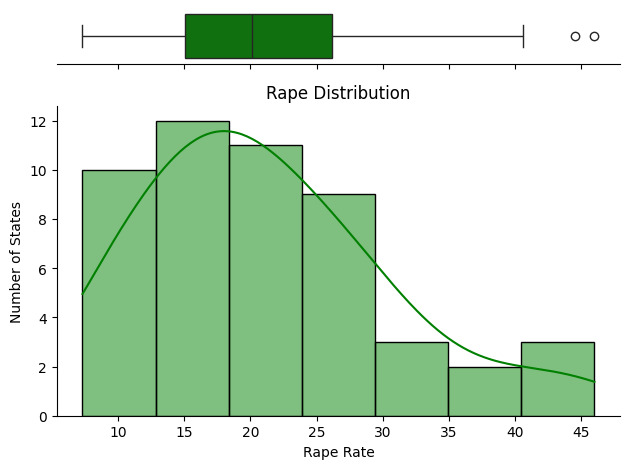

In [96]:
plot_column_distribution(us_arrests_df, 'Rape')


### This visualization illustrates the distribution of rape rates across U.S. states:

- The box plot indicates that the middle 50% of states have rape rates between approximately 15 and 27, with a median around 20. There are two outliers on the high end, as shown by the points to the right.
- The histogram shows a left-skewed distribution, with most states having rape rates between 10 and 25. The frequency drops significantly for rates above 30.
- The density curve aligns with this, showing a peak around 17-20 and a sharp decline as rates increase.

**Assumptions**:
- Most states have moderate rape rates, with few states showing extremely high rates, evidenced by the outliers.
- The data is slightly left-skewed, suggesting that higher rape rates are rare but present in a few outlying states.

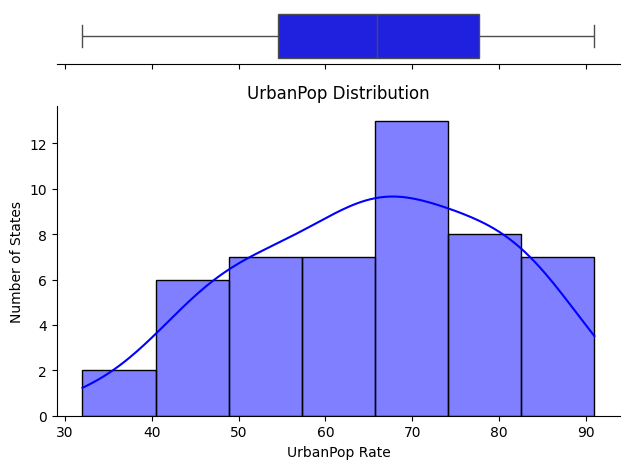

In [97]:
plot_column_distribution(us_arrests_df, 'UrbanPop')


### This visualization depicts the distribution of urban population rates (UrbanPop) across U.S. states:

- The box plot at the top shows that the middle 50% of states have urban population rates between about 55 and 80, with a median around 70.
- The histogram shows a fairly symmetric distribution, with most states having urban population rates between 50 and 80. There is a peak around 70.
- The density curve suggests a slight right-skew, but overall the distribution is close to normal.

**Assumptions**:
- Most states have a moderately high level of urbanization, with few outliers.
- Urban population rates are fairly evenly distributed, with no extreme skew or significant clustering at the lower or higher ends of the distribution.

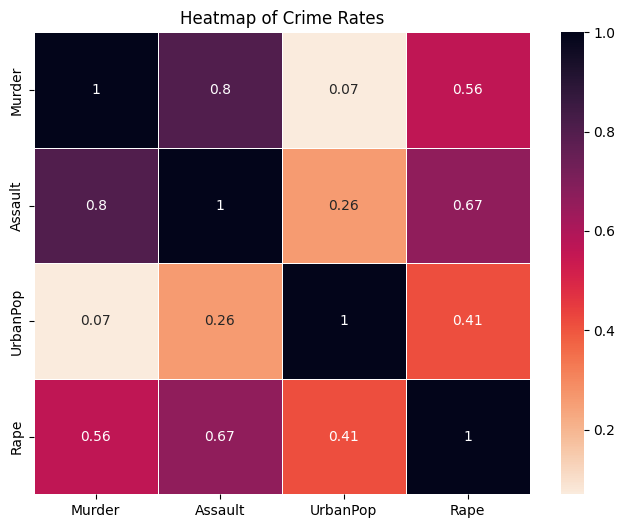

In [98]:
# Select crime-related columns for the heatmap
crime_data = us_arrests_df[['Murder', 'Assault', 'UrbanPop', 'Rape']]

# Generate the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(crime_data.corr(), annot=True, cmap='rocket_r', linewidths=0.5)

# Add a title to the heatmap
plt.title('Heatmap of Crime Rates')

# Display the heatmap
plt.show()


### This heatmap illustrates the correlation between different crime rates and urban population (UrbanPop) across U.S. states:

- **Murder** and **Assault** are highly correlated (0.8), indicating that states with higher murder rates tend to also have higher assault rates.
- **Rape** has moderate correlations with both **Assault** (0.67) and **Murder** (0.56), suggesting that these crimes may tend to occur together to some extent.
- **UrbanPop** shows low correlations with all crime rates, particularly with **Murder** (0.07) and **Assault** (0.26), indicating that urbanization doesn't strongly influence these crime rates.
- **Rape** and **UrbanPop** have a moderate correlation (0.41), suggesting a slight association between higher urban populations and rape rates.

**Assumptions**:
- There is a notable clustering of violent crimes (murder, assault, rape), but urbanization doesn't play a significant role in explaining the variation in these crime rates.
- Crime types may share common socio-economic factors that drive their rates across states.

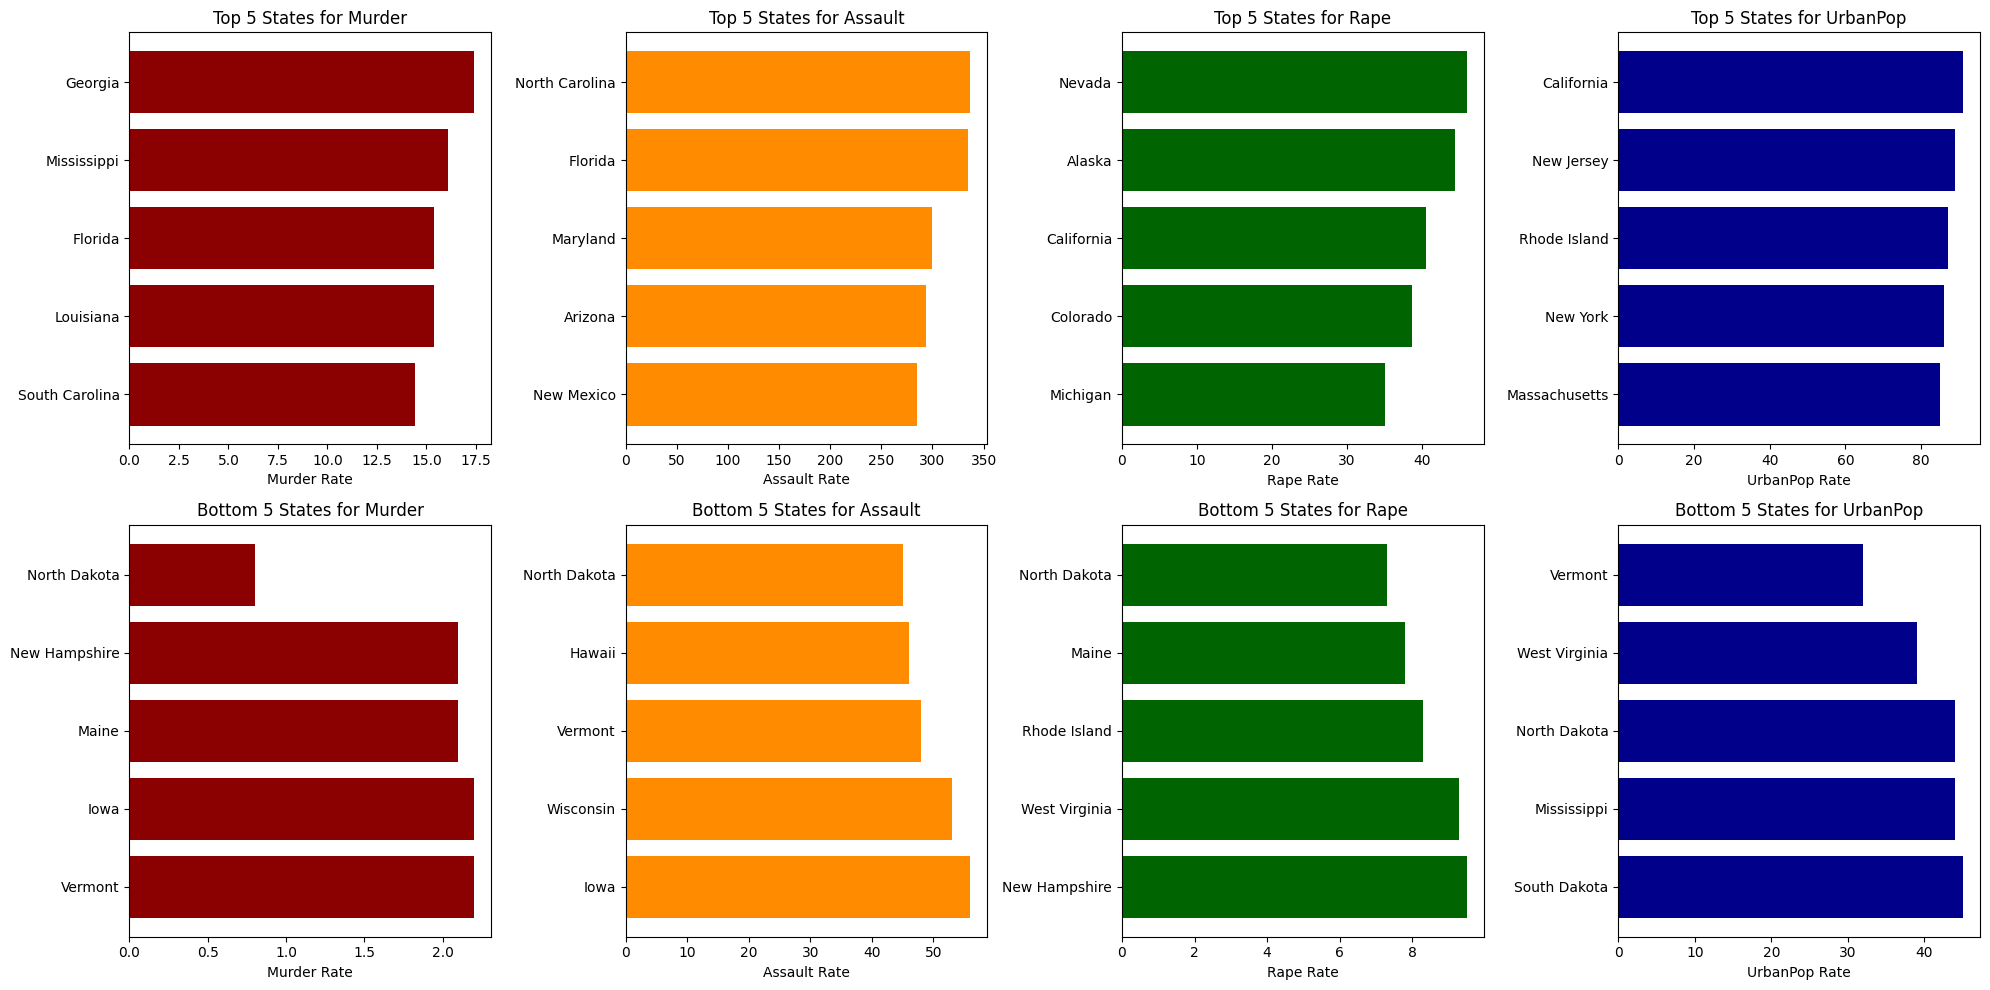

In [99]:
# List of crime types and colors for plotting
crime_types = ['Murder', 'Assault', 'Rape', 'UrbanPop']
colors = ['darkred', 'darkorange', 'darkgreen', 'darkblue']

# Create a figure with subplots for both top and bottom crime rankings
fig, axes = plt.subplots(2, 4, figsize=(20, 10))  # 2 rows: one for top 5, one for bottom 5

# Loop through each crime type and generate both top and bottom plots
for index, crime in enumerate(crime_types):
    # Get the top 5 and bottom 5 states for the current crime type
    top_5_states = us_arrests_df.sort_values(by=crime, ascending=False).head(5)
    bottom_5_states = us_arrests_df.sort_values(by=crime, ascending=True).head(5)
    
    # Plot top 5 states by crime rate (first row)
    axes[0, index].barh(top_5_states['State'], top_5_states[crime], color=colors[index])
    axes[0, index].set_title(f'Top 5 States for {crime}')
    axes[0, index].set_xlabel(f'{crime} Rate')
    axes[0, index].invert_yaxis()  # Highest value at the top
    
    # Plot bottom 5 states by crime rate (second row)
    axes[1, index].barh(bottom_5_states['State'], bottom_5_states[crime], color=colors[index])
    axes[1, index].set_title(f'Bottom 5 States for {crime}')
    axes[1, index].set_xlabel(f'{crime} Rate')
    axes[1, index].invert_yaxis()  # Highest value at the top

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


### This visualization shows the top and bottom 5 states for murder, assault, rape, and urban population rates:

- **Top 5 States for Murder**: Southern states like Georgia, Mississippi, and South Carolina have the highest murder rates, suggesting regional factors may contribute to violent crime.
- **Top 5 States for Assault**: States like North Carolina and Florida lead in assault rates, indicating that certain states may have higher incidences of violent crime.
- **Top 5 States for Rape**: Nevada and Alaska have the highest rape rates, suggesting possible issues related to crime or reporting in these states.
- **Top 5 States for UrbanPop**: Highly urbanized states like California, New Jersey, and New York dominate the top of this category.

- **Bottom 5 States for Murder, Assault, and Rape**: States like North Dakota and Vermont consistently appear in the bottom 5, indicating low crime rates in these states.
- **Bottom 5 States for UrbanPop**: Rural states like Vermont, West Virginia, and North Dakota have the lowest urbanization rates.

**Assumptions**:
- Crime rates are likely influenced by regional or demographic factors, with southern and urbanized states having higher rates of violent crime.
- States with lower urban populations tend to have lower crime rates, but urbanization itself does not always correlate directly with higher crime.

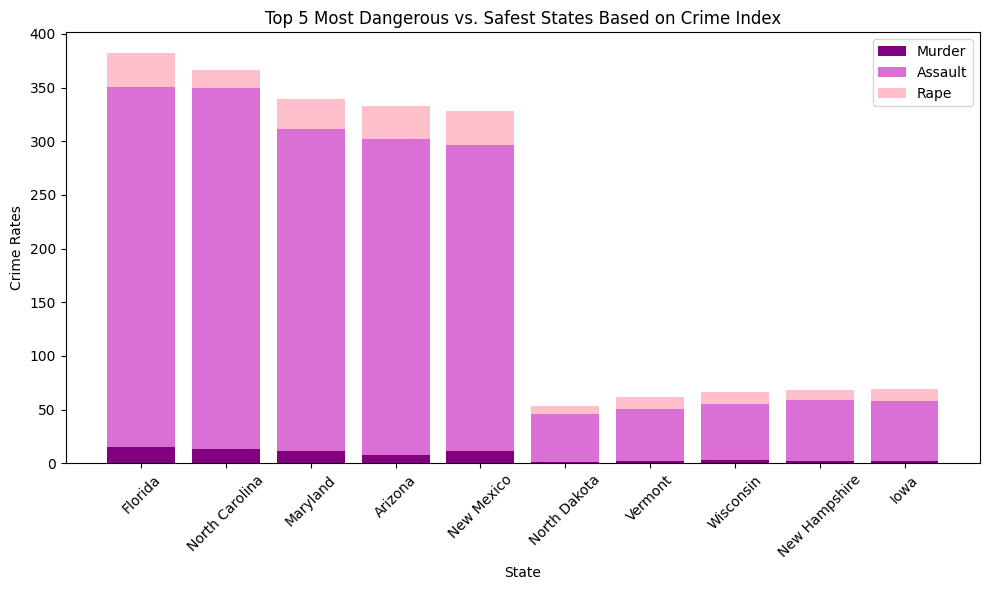

In [100]:
# Sort the DataFrame by 'total_crime' to get the most dangerous and safest states
most_dangerous_states = us_arrests_df.sort_values(by='total_crime', ascending=False).head(5)
safest_states = us_arrests_df.sort_values(by='total_crime', ascending=True).head(5)

# Combine the top 5 most dangerous and safest states for visualization
danger_safety_df = pd.concat([most_dangerous_states, safest_states])

# Create a grouped bar chart
plt.figure(figsize=(10, 6))
plt.bar(danger_safety_df['State'], danger_safety_df['Murder'], label='Murder', color='purple')
plt.bar(danger_safety_df['State'], danger_safety_df['Assault'], 
        bottom=danger_safety_df['Murder'], label='Assault', color='orchid')
plt.bar(danger_safety_df['State'], danger_safety_df['Rape'], 
        bottom=danger_safety_df['Murder'] + danger_safety_df['Assault'], label='Rape', color='pink')

# Add labels and title
plt.xlabel('State')
plt.ylabel('Crime Rates')
plt.title('Top 5 Most Dangerous vs. Safest States Based on Crime Index')
plt.xticks(rotation=45)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


### This bar chart compares the top 5 most dangerous states with the top 5 safest states based on a crime index that combines murder, assault, and rape rates:

- **Most Dangerous States**: Florida, North Carolina, and Maryland have the highest overall crime rates, primarily driven by high assault rates (shown in pink), with notable contributions from rape and murder.
- **Safest States**: North Dakota, Vermont, Wisconsin, New Hampshire, and Iowa have significantly lower crime rates across all categories, particularly in terms of murder and rape.

**Assumptions**:
- States with higher assault rates tend to rank as the most dangerous, with Florida and North Carolina leading.
- The safest states have low levels of all types of violent crime, reinforcing their positions as low-risk areas.
- Assault seems to play the largest role in differentiating the most dangerous states from the safest ones.

# Interactive Maps

**Crime Rate Comparison Across States:**

Which states have the highest and lowest crime rates? Are certain crimes more prevalent in particular states?

These interactive choropleth maps allow you to explore the data in detail by hovering over each state to reveal additional information, such as exact crime rates. The color intensity in each heatmap corresponds to the magnitude of the crime rate — the higher the rate, the more intense the color. 

The dataset is visualized across five separate maps, each focusing on a specific column: **UrbanPop**, **Murder**, **Assault**, **Rape**, and **Total Crime**. This allows for a comprehensive comparison of crime patterns across different states, helping to identify geographic trends and correlations.

In [101]:
def plot_choropleth(dataframe, column_name, color_scale):
    """
    This function creates a choropleth map for a given column in a DataFrame.
    
    Parameters:
    - dataframe: The pandas DataFrame containing the data.
    - column_name: The column in the DataFrame to use for coloring the map.
    - color_scale: The color scale for the choropleth (e.g., 'sunset', 'Viridis', etc.).
    """
    
    # Create the choropleth map
    fig = px.choropleth(dataframe, 
                        locations='state_abbrev', 
                        locationmode="USA-states", 
                        color=column_name, 
                        scope="usa",
                        hover_name='State',
                        title=f"{column_name.capitalize()} Rates by State",
                        color_continuous_scale=color_scale)
    
    # Show the plot
    fig.show()
    
    # Save the plot as an HTML file
    fig.write_html(f"{column_name}.html")
   

plot_choropleth(us_arrests_df, 'UrbanPop', 'blues')


In [102]:
plot_choropleth(us_arrests_df, 'Murder', 'reds')


In [103]:
plot_choropleth(us_arrests_df, 'Assault', 'oranges')


In [104]:
plot_choropleth(us_arrests_df, 'Rape', 'greens')


In [105]:
plot_choropleth(us_arrests_df, 'total_crime', 'sunset')


### References:

https://statisticsbyjim.com/basics/bimodal-distribution/

https://www.scaler.com/topics/matplotlib/plotting-multiple-bar-chart/

https://plotly.com/python/interactive-html-export/#:~:text=Any%20figure%20can%20be%20saved,access%20the%20fully%20interactive%20figure.

https://stackoverflow.com/questions/33381330/histogram-with-boxplot-above-in-python

https://www.geeksforgeeks.org/how-to-rename-columns-in-pandas-dataframe/

https://seaborn.pydata.org/tutorial/color_palettes.html

https://matplotlib.org/stable/gallery/color/named_colors.html

https://plotly.com/python/builtin-colorscales/

https://www.geeksforgeeks.org/choropleth-maps-using-plotly-in-python/

https://www.simplypsychology.org/boxplots.html

https://www.earthdatascience.org/courses/intro-to-earth-data-science/file-formats/use-text-files/format-text-with-markdown-jupyter-notebook/

https://islp.readthedocs.io/en/latest/datasets/USArrests.html

https://rdrr.io/r/datasets/USArrests.html

https://www.rdocumentation.org/packages/datasets/versions/3.6.2/topics/USArrests
